# Seattle Bicycle Dataset

As a more involved example of working with some time series data and visualization, let's take a look at bicycle counts on Seattle's [Fremont Bridge](http://www.openstreetmap.org/#map=17/47.64813/-122.34965).
This data comes from an automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge.
The hourly bicycle counts can be downloaded from http://data.seattle.gov/; here is the [direct link to the dataset](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k).

The data was last downloaded in April 2019. We can use Pandas to read the CSV output into a ``DataFrame``.
We will specify that we want the Date as an index, and we want these dates to be automatically parsed:

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})  # Figure size

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = 'https://raw.githubusercontent.com/soltaniehha/Business-Analytics/master/data/FremontBridge.csv'

data = pd.read_csv(url, parse_dates=True, index_col= 'Date')

print("There are {} rows and {} columns in this DataFrame.".format(data.shape[0], data.shape[1]))

There are 56904 rows and 2 columns in this DataFrame.


In [3]:
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-03-31 23:00:00,6.0,10.0
2019-03-31 22:00:00,7.0,14.0
2019-03-31 21:00:00,18.0,15.0
2019-03-31 20:00:00,26.0,31.0
2019-03-31 19:00:00,30.0,58.0


For convenience, we'll further process this dataset by shortening the column names:

In order to do this pass `['West', 'East']` to `data.columns` to overweite the existing column names:

In [0]:
# Your answer goes here


Add a "Total" column by adding `data['West']` and  `data['East']`:

In [0]:
# Your answer goes here


Now let's take a look at the summary statistics for this data:

In [6]:
data.describe()

,West,East,Total
count,56895.000000,56895.000000,56895.000000
mean,51.972353,58.154478,110.126830
std,67.479946,84.679053,139.538643
min,0.000000,0.000000,0.000000
25%,6.000000,7.000000,14.000000
50%,28.000000,29.000000,59.000000
75%,69.000000,70.000000,143.000000
max,698.000000,717.000000,957.000000


### Visualizing the data

We can gain some insight into the dataset by visualizing it.
Let's start by plotting the raw data by `data.plot()`.

Note that the following packages were already loaded at the top of this notebook:

```python
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
```

Can you add the `ylabel` to this plot?

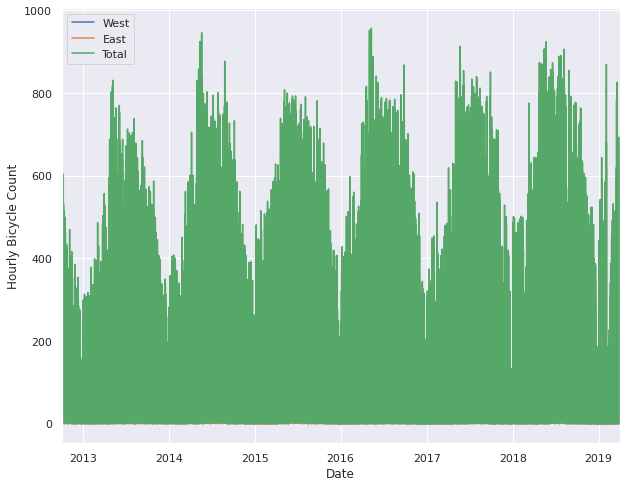

In [7]:
# Your answer goes here


The ~57,000 hourly samples are far too dense for us to make much sense of.
We can gain more insight by resampling the data to a coarser grid.
Let's resample by week and call it `weekly`:

In [0]:
# Your answer goes here


In [9]:
weekly.head()

,West,East,Total
Date,,,
2012-10-07,7297.0,6995.0,14292.0
2012-10-14,8679.0,8116.0,16795.0
2012-10-21,7946.0,7563.0,15509.0
2012-10-28,6901.0,6536.0,13437.0
2012-11-04,6408.0,5786.0,12194.0


using `.plot()` on `weekly` plot the time series in this DataFrame. To make it cleaner use `style=[':', '--', '-']` argument for the `plot()` method to give the lines different shapes.

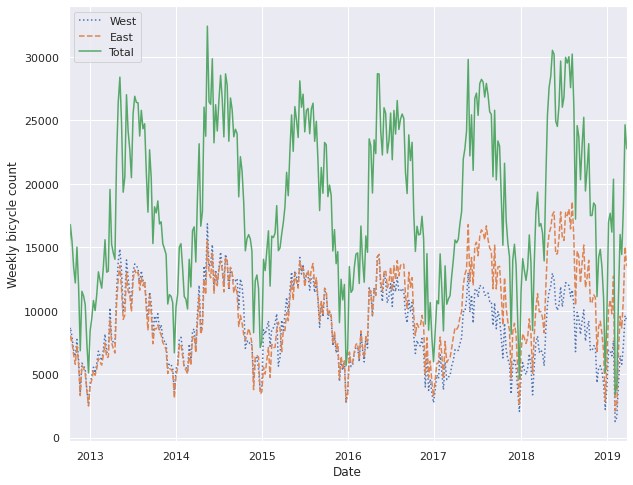

In [10]:
# Your answer goes here


This shows us some interesting seasonal trends: as you might expect, people bicycle more in the summer than in the winter, and even within a particular season the bicycle use varies from week to week (likely dependent on weather).

Another way that comes in handy for aggregating the data is to use a rolling mean, utilizing the ``pd.rolling()`` function.

Using a 30-day rolling average, plot the daily number of bikes passing the bridge. Make sure to center the window:

1. Create a new DataFrame called `daily`. Use `resample()` to find the `sum()` for each day. Since we are interested in daily aggregates we need to use 'D'.
2. Create a new DataFrame called `rolling`. This DF is a 30-day rolling average of `daily` with the option `center=True`. Note that we want to chain function `mean()` to this rolling window.
3. Plot `rolling` DF. Like the chart above use different styles for different lines.
4. Add a `ylabel`

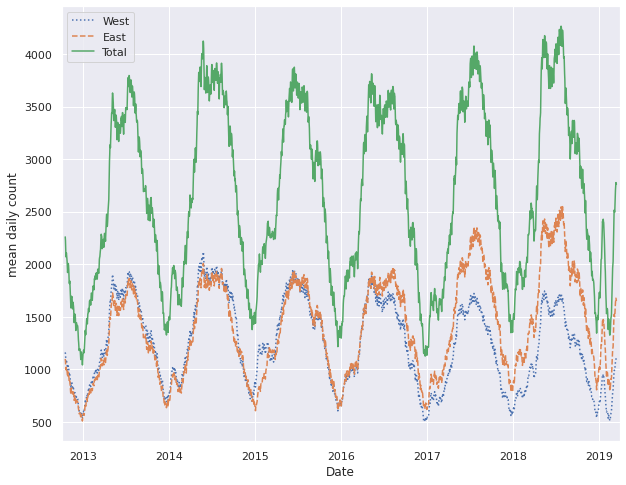

In [11]:
# Your answer goes here


The jaggedness of the result is due to the hard cutoff of the window.
We can get a smoother version of a rolling mean using a window function–for example, a Gaussian window.
The following code specifies both the width of the window (we chose 50 days) and the width of the Gaussian within the window (we chose 10 days):

1. Repeat the steps above to create a new `rolling` DataFrame with a "gaussian" window type. You can do this by specifying `win_type='gaussian'` in `rolling()`.
2. gaussian method needs a `std`. Pass this to `mean()`: `std=10`.
3. Plot it

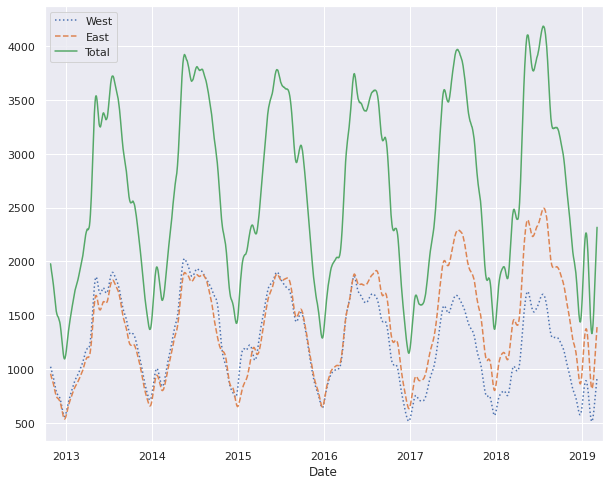

In [12]:
# Your answer goes here


### Digging into the data

While these smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure.
For example, we might want to look at the average traffic as a function of the time of day.
We can do this using the GroupBy functionality:

In [13]:
by_time = data.groupby(data.index.time).mean()
by_time.head()

,West,East,Total
00:00:00,4.994517,6.638127,11.632644
01:00:00,2.781105,3.332771,6.113876
02:00:00,1.998309,2.082418,4.080727
03:00:00,1.563054,1.420498,2.983551
04:00:00,3.514973,3.042176,6.557149


Plot this `by_time` DF, using different line style. You can set the `xticks` to the values you like by passing something like `xticks=[0, 14400, 28800, 43200, 57600, 72000]` to `plot()`, which is the number of seconds representing the time we would like to show on the x axis:

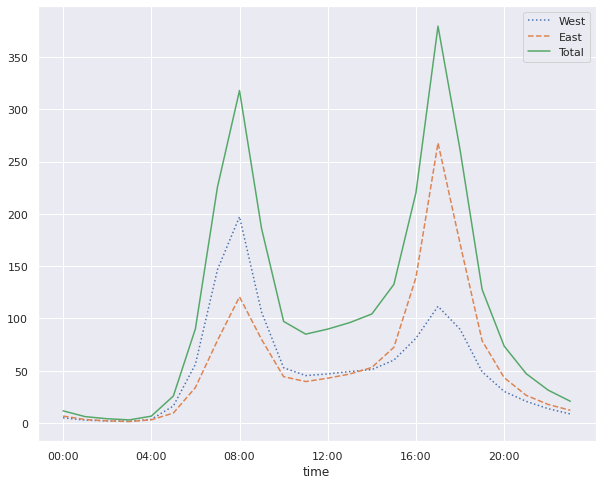

In [14]:
# Your answer goes here


The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening.
This is likely evidence of a strong component of commuter traffic crossing the bridge.
This is further evidenced by the differences between the western sidewalk (generally used going toward downtown Seattle), which peaks more strongly in the morning, and the eastern sidewalk (generally used going away from downtown Seattle), which peaks more strongly in the evening.

We also might be curious about how things change based on the day of the week. Again, we can do this with a simple groupby:

1. Like above create a new DataFrame (call it `by_weekday`) by a groupby. Use `data.index.dayofweek` for grouping.
2. Plot the time series
3. Print the DataFrame

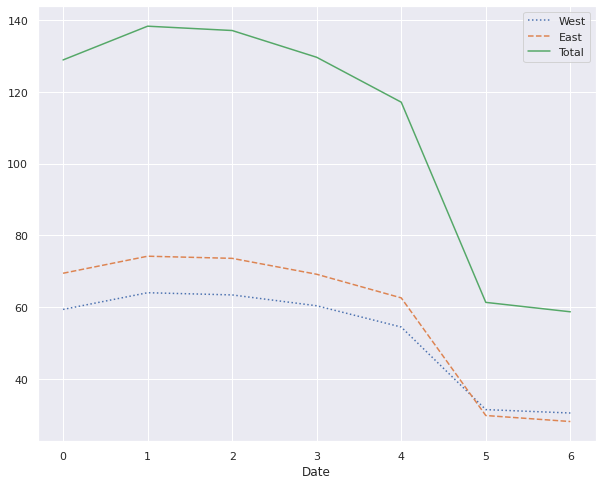

In [15]:
# Your answer goes here


In [16]:
# Your answer goes here


,West,East,Total
Date,,,
0,59.398176,69.470414,128.868590
1,64.049075,74.215783,138.264858
2,63.439282,73.620329,137.059612
3,60.417404,69.189528,129.606932
4,54.491271,62.611753,117.103024
5,31.504302,29.857670,61.361971
6,30.554913,28.183249,58.738163


This shows a strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

With this in mind, let's do a compound GroupBy and look at the hourly trend on weekdays versus weekends.
We'll start by grouping by both a flag marking the weekend, and the time of day:

In [0]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

Now we'll use some of the Matplotlib tools to plot two panels side by side:

1. First, use `fig, ax = plt.subplots(1, 2, figsize=(14, 5))` to specify the number of subplots in your chart
2. Seperately, for each of `by_time.loc['Weekday']` and `by_time.loc['Weekend']` plot their time series.
3. For each subplot provide an argument `ax`. This is the axes that will be used to draw that plot. For instance for one plot we will use `ax=ax[0]` and for the other one `ax=ax[1]`.
4. For each subplot provide an appropriate `title` inside `plot()`.
5. For each subplot specify the line style.
6. Use `xticks=[0, 14400, 28800, 43200, 57600, 72000]` to make the ticks look nicer.

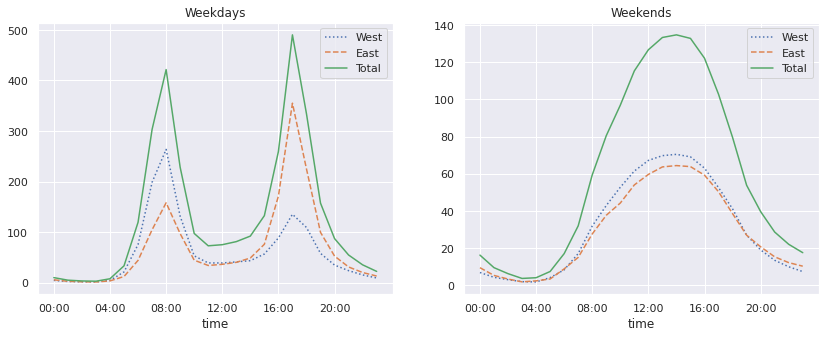

In [18]:
# Your answer goes here


The result is very interesting: we see a bimodal commute pattern during the work week, and a unimodal recreational pattern during the weekends.
It would be interesting to dig through this data in more detail, and examine the effect of weather, temperature, time of year, and other factors on people's commuting patterns; for further discussion, see this blog post ["Is Seattle Really Seeing an Uptick In Cycling?"](https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/), which uses a subset of this data.